In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy as sp
import re
from pprint import pprint
!pip install tqdm
from tqdm import tqdm


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [16]:
def get_experiments_list(base_path="/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results/",model="ff",dataset="fashionmnist"):
    path=f"{base_path}/{model}/{dataset}/"
    experiments_list=os.listdir(path)
    path_list=list()
    for exp in experiments_list:
        exp=f"{path}/{exp}"
        path_list.append(exp)
    return path_list

In [17]:
def base_info(path):
    d = dict()
    d["name"]=os.path.basename(path)
    split=d["name"].split("_")
    d["norm"]=split[1]
    d["epochs"]=float(split[2])
    d["batch"]=int(split[3])
    d["lr"]=float(split[4])
    d["path"]=path
    return d

def parse_stat(path):
    d=base_info(path)
    try:
        with open(f"{path}/stats.txt", mode="r") as file:
            for line in file:
                
                if groups:=re.search(r"Total Accuracy (?P<total_accuracy>[0-9][0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    d["accuracy"]=float(group_dict["total_accuracy"])
                    
                if groups:=re.search(r"Accuracy (?P<class>[0-9]) (?P<class_accuracy>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    label=group_dict["class"]
                    d[f"class_accuracy_{label}"]=float(group_dict["class_accuracy"])

                if groups:=re.search(r"Layer (?P<layer>[0-9]) sparseness (?P<sparseness>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    layer=group_dict["layer"]
                    d[f"sparseness_layer_{layer}"]=float(group_dict["sparseness"])
                    
                if groups:=re.search(r"Layer (?P<layer>[0-9]) (?P<class>[0-9]) sparseness (?P<sparseness>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    layer=group_dict["layer"]
                    label=group_dict["class"]
                    d[f"sparseness_layer_{layer}_class_{label}"]=float(group_dict["sparseness"])
                    #print(groups.groupdict())
        return d
    except Exception as e:
        print(f"Error opening {e}")
#        df = pd.DataFrame(data, index=[0])


In [18]:
list_exp=get_experiments_list(dataset="fashionmnist",model="ff")

df_ff=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_ff= pd.concat([df_ff, pd.DataFrame([data])], ignore_index=True)   
df_ff=df_ff[(df_ff["accuracy"]>0.80) & (df_ff["norm"]=="l2") & (df_ff["batch"]==1024) ]
print(df_ff[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

     accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
2      0.8347            0.677867            0.589806            0.497488
13     0.8153            0.587787            0.613833            0.566508
29     0.8239            0.687423            0.610198            0.469201
39     0.8243            0.998586            0.970355            0.910454
44     0.8409            0.709076            0.570912            0.373775
57     0.8494            0.745031            0.515030            0.564652
63     0.8383            0.698888            0.584827            0.445865
65     0.8498            0.768381            0.498101            0.566154
81     0.8360            0.807406            0.513846            0.761569
91     0.8255            0.785876            0.511808            0.542983
101    0.8421            0.724742            0.511781            0.479312
106    0.8317            0.829437            0.579509            0.766620
115    0.8098            0.747694     

In [6]:
list_exp=get_experiments_list(dataset="fashionmnist",model="bp")

df_bp=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_bp= pd.concat([df_bp, pd.DataFrame([data])], ignore_index=True)   
#print(df_bp)
df_bp=df_bp[(df_bp["accuracy"]>0.88) & (df_bp["norm"]=="l2") & (df_bp["batch"]==1024)  ]
print(df_bp[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

    accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
2     0.8963            0.347389            0.238172            0.246158
4     0.8938            0.358594            0.238621            0.245026
5     0.8862            0.589445            0.484314            0.432184
7     0.8954            0.762904            0.643861            0.481272
8     0.8837            0.320743            0.249926            0.280014
11    0.8949            0.642443            0.493941            0.423404
12    0.8878            0.696076            0.549912            0.434270
29    0.8955            0.741974            0.602640            0.463514
30    0.8960            0.352070            0.237172            0.261125
31    0.8957            0.726596            0.557147            0.413761
34    0.8820            0.921617            0.892477            0.811649
43    0.8916            0.329086            0.235640            0.260686
47    0.8812            0.947457            0.87175

In [7]:
list_exp=get_experiments_list(dataset="fashionmnist",model="bp_ff")

df_bp_ff=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_bp_ff= pd.concat([df_bp_ff, pd.DataFrame([data])], ignore_index=True)   
df_bp_ff=df_bp_ff[(df_bp_ff["accuracy"]>0.87) & (df_bp_ff["norm"]=="l2") & (df_bp_ff["batch"]==1024)  ]
print(df_bp_ff[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

     accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
1      0.8704            0.662225            0.813698            0.031508
2      0.8752            0.880345            0.826190            0.016128
13     0.8764            0.844564            0.847264            0.018335
16     0.8758            0.799801            0.850942            0.025258
17     0.8733            0.902505            0.850616            0.163475
22     0.8710            0.690392            0.852824            0.028643
29     0.8754            0.920179            0.836777            0.147321
33     0.8775            0.761760            0.845051            0.024728
44     0.8746            0.904582            0.825312            0.016434
63     0.8780            0.891675            0.849992            0.015561
101    0.8737            0.939786            0.839512            0.169553


In [8]:
df_ff.loc[101]["sparseness_layer_1"]

0.5117806833943196

In [9]:
selected_model={"ff":[df_ff,101],
                "bp":[df_bp,2],
                "bp_ff":[df_bp_ff,2]}

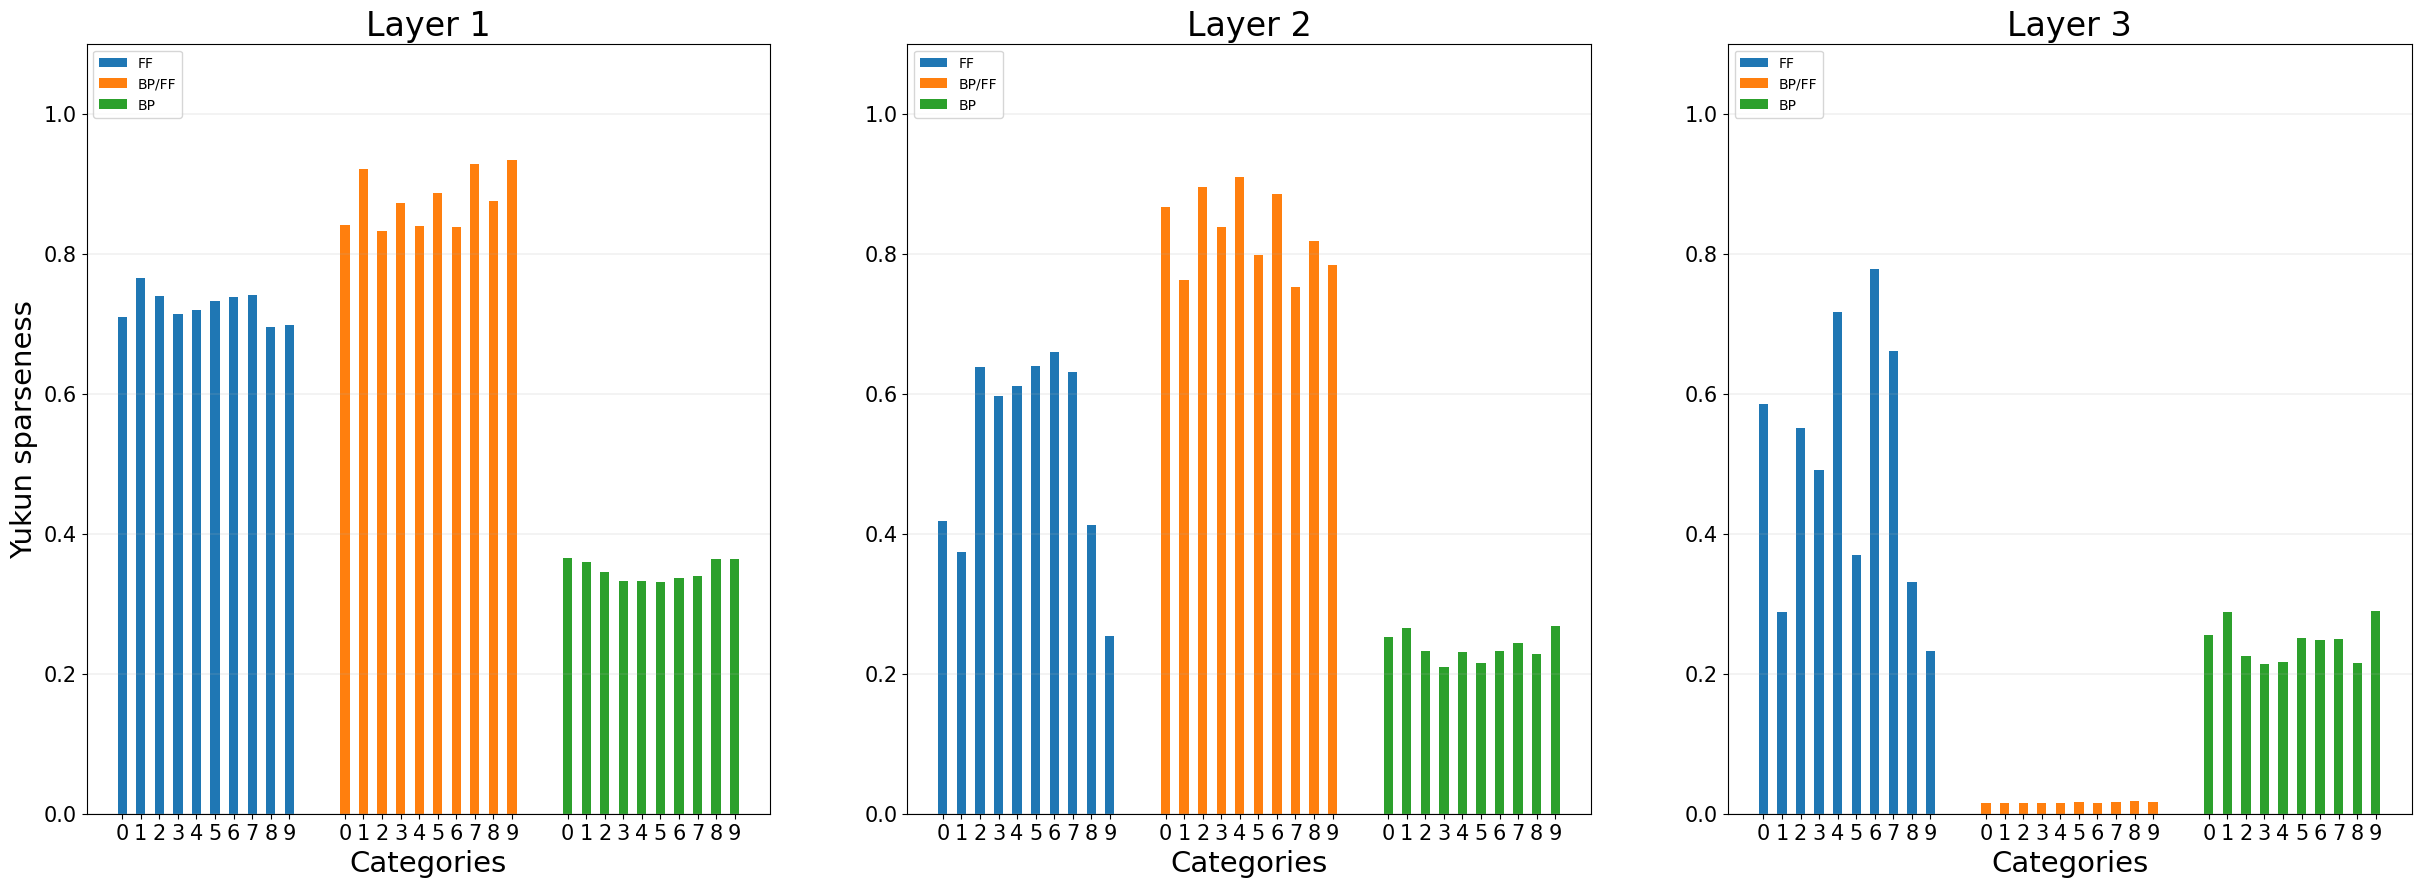

In [10]:
def calculateSize(selected_model):
    '''
    Calculate  the size of the ensembles for each model,layer and category.
    '''
    jitter=np.array([i/10 for i in range(0,10)])
    labels=[i for j in range(3) for i in range(10)]
    #with plt.style.context("_mpl-gallery-nogrid"):
    plt.figure(figsize=(30,10))
    for layer in range(3):
        plt.subplot(1,3,1+layer)
        i=0
        ticks=list()
        for model in ['ff','bp_ff','bp']:
            i+=1.2
            dataframe,index=selected_model[model]
            units=list()
            for lbl in range(10):
                units.append(dataframe.loc[index][f"sparseness_layer_{layer}_class_{lbl}"])
            plt.ylim([0,1.1])
            #plt.yscale("log")
            plt.bar(i+jitter,units,label=model,width=0.05)
            ticks+=(i+jitter).tolist()
        plt.legend(labels=['FF','BP/FF','BP'],loc='upper left')
        plt.title(f'Layer {layer+1}',fontsize=24)
        plt.xticks(ticks=ticks, labels=labels,fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel("Categories",fontsize=21)
        if layer==0:
            plt.ylabel("Yukun sparseness",fontsize=21)
        plt.grid(axis="y",which="both",linewidth=0.2)

calculateSize(selected_model)

In [11]:
def ensembles_loo(representation, thr=0.05):
    means=representation.mean(0)
    ensemble=[]
    for n_id in range(representation.shape[1]):
        means[n_id]
        loo_mean=np.delete(means, n_id, axis=0).mean()
        if (means[n_id]-loo_mean*1)/loo_mean>1:
            ensemble.append(n_id)
        #print(means[n_id], loo_mean)
    return ensemble

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_shared(path):


    #path=f'/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_200_1024_0.001/'
    reps=np.load(path+'reps_0.npy')
    lbls=np.load(path+'lbls_0.npy')
    preds=np.load(path+'prediction_0.npy')
    
    total_data=len(preds)
    order=np.argsort(lbls)
    #order reps,lbls,preds
    reps=reps[order]
    lbls=lbls[order]
    preds=preds[order]
    
    correct=(lbls==preds)
    
    reps=reps[correct]
    lbls=lbls[correct]
    preds=preds[correct]
         
    
    classes=['T-shirt', 'Trouser', 'Pullover', 'Dress' ,'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    active=[]
    for i in range(10):
        if True:
            curr_class=reps[:,0][lbls==i]
            active.append(ensembles_loo(curr_class))
        else:    
            curr_class=reps[:,0][lbls==i]
            thr=np.quantile(curr_class, q=0.9)
            mean=np.median(curr_class, axis=0)
            active.append(np.where(mean>thr)[0])
    
    #active=np.array(active)
    mat=np.zeros((10,10))
    annot_labels = np.empty_like(mat, dtype=str)
    
    for i in range(10):
        for j in range(i+1,10):
            mat[i,j]=(len(np.intersect1d(active[i],active[j])))
            print(f"Intersect: {mat[i,j]} i_len {len(active[i])} j_len {len(active[j])}")
            mat[j,i]=mat[i,j]
            if mat[i,j]>0:
                annot_labels[i,j]=mat[i,j]
                annot_labels[j,i]=mat[j,i]
    print(mat)
    plt.figure(figsize=(8,8), dpi=50)
    sns.set(font_scale = 1.8)
    
    ax =sns.heatmap(mat, cmap='Blues', annot=annot_labels, annot_kws={"fontsize":14},fmt='', xticklabels=classes, yticklabels=classes, cbar=False)
    ax.set_yticklabels(labels=classes, weight='bold')
    ax.set_xticklabels(labels=classes, weight='bold')
    ax.tick_params(left=False, bottom=False)
    #plt.savefig('heatmap.png', bbox_inches = "tight")
    plt.show()
df_ff.loc[106]["path"]

'/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_100_1024_0.01'

Intersect: 0.0 i_len 53 j_len 22
Intersect: 0.0 i_len 53 j_len 43
Intersect: 0.0 i_len 53 j_len 57
Intersect: 0.0 i_len 53 j_len 65
Intersect: 0.0 i_len 53 j_len 91
Intersect: 3.0 i_len 53 j_len 39
Intersect: 0.0 i_len 53 j_len 84
Intersect: 0.0 i_len 53 j_len 87
Intersect: 0.0 i_len 53 j_len 84
Intersect: 0.0 i_len 22 j_len 43
Intersect: 0.0 i_len 22 j_len 57
Intersect: 0.0 i_len 22 j_len 65
Intersect: 0.0 i_len 22 j_len 91
Intersect: 0.0 i_len 22 j_len 39
Intersect: 0.0 i_len 22 j_len 84
Intersect: 0.0 i_len 22 j_len 87
Intersect: 0.0 i_len 22 j_len 84
Intersect: 0.0 i_len 43 j_len 57
Intersect: 3.0 i_len 43 j_len 65
Intersect: 0.0 i_len 43 j_len 91
Intersect: 5.0 i_len 43 j_len 39
Intersect: 0.0 i_len 43 j_len 84
Intersect: 0.0 i_len 43 j_len 87
Intersect: 0.0 i_len 43 j_len 84
Intersect: 0.0 i_len 57 j_len 65
Intersect: 0.0 i_len 57 j_len 91
Intersect: 0.0 i_len 57 j_len 39
Intersect: 0.0 i_len 57 j_len 84
Intersect: 0.0 i_len 57 j_len 87
Intersect: 0.0 i_len 57 j_len 84
Intersect:

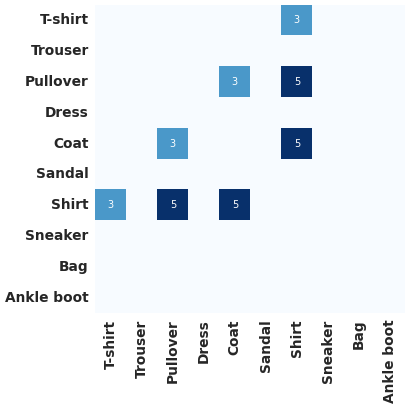

In [13]:
plot_shared('/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_100_1024_0.01/')

/tmp/ipykernel_3374407/1728693603.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


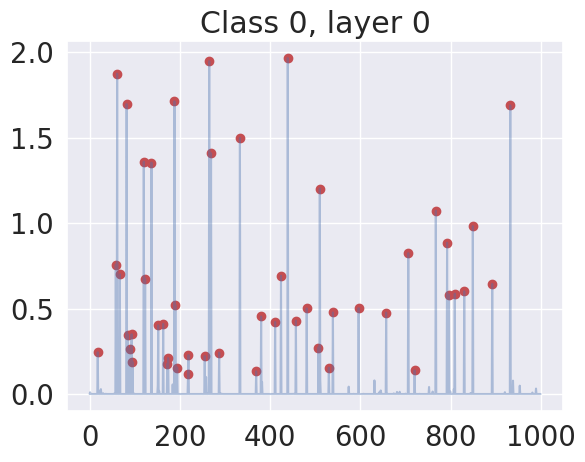

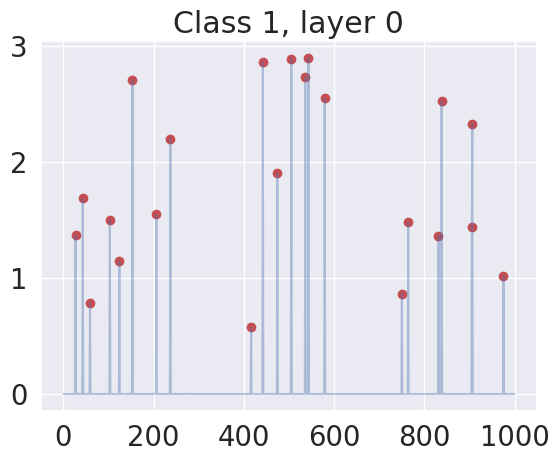

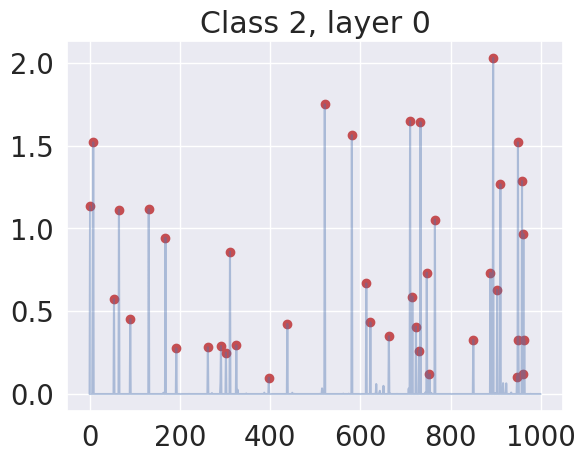

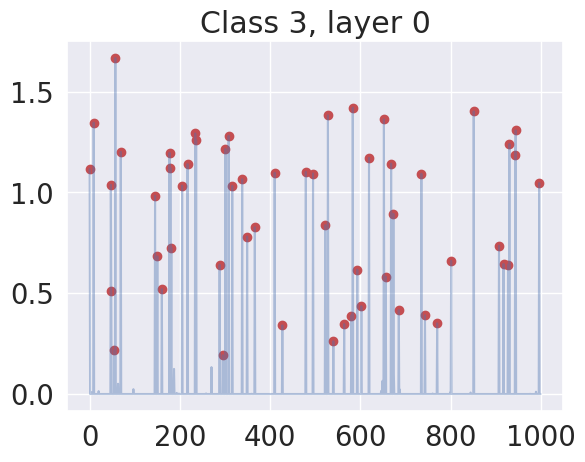

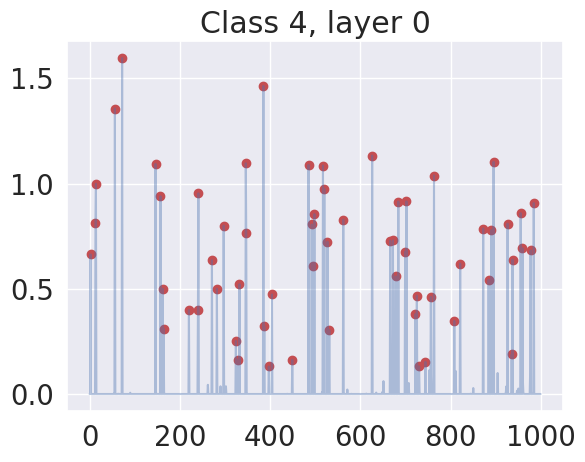

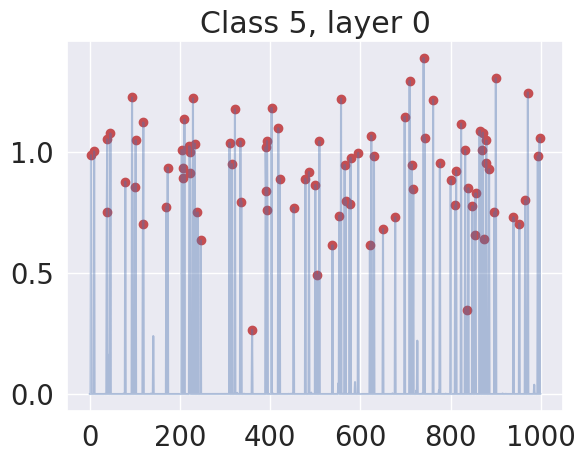

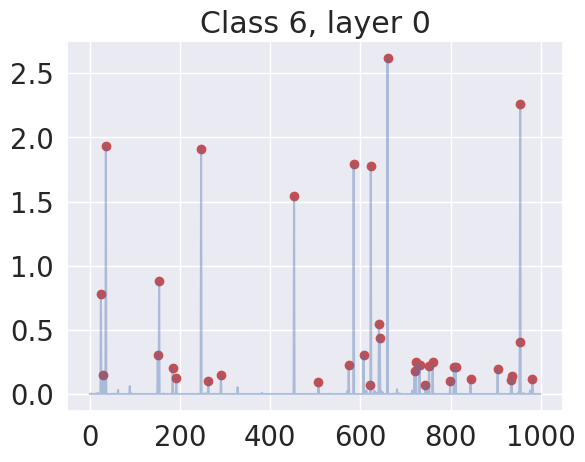

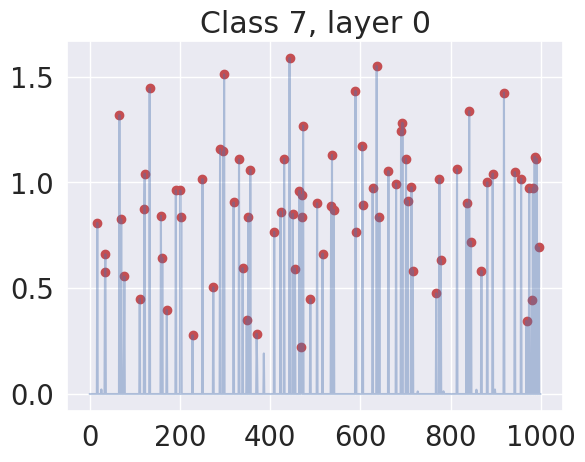

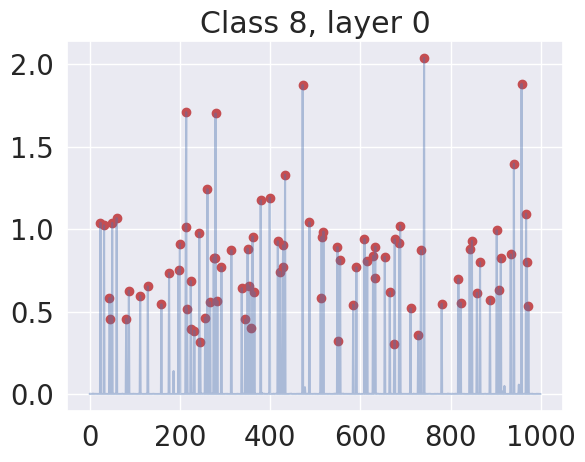

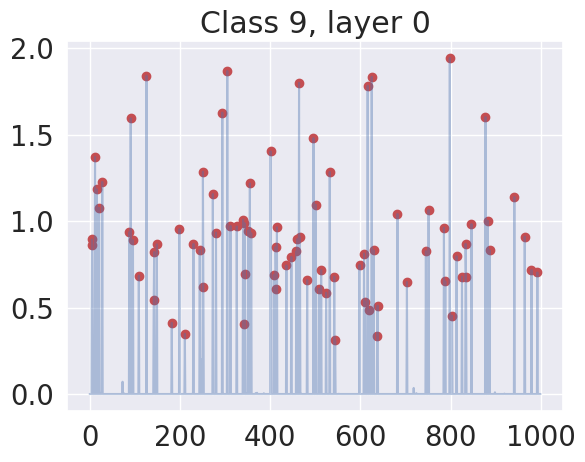

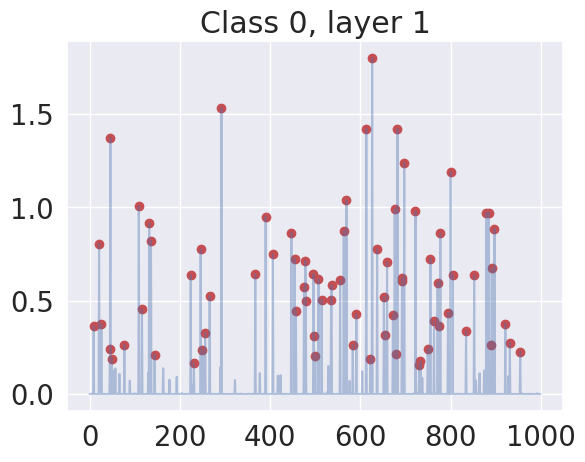

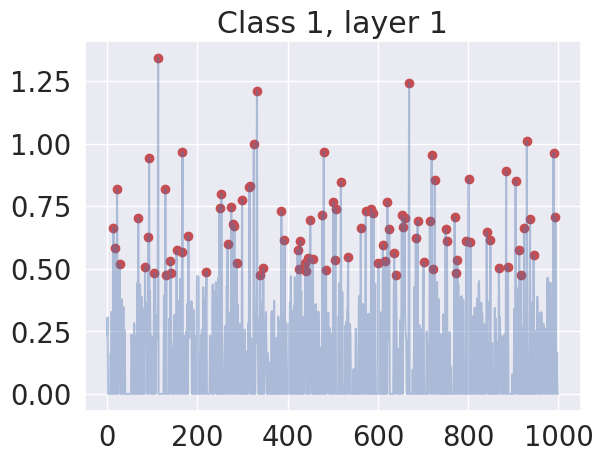

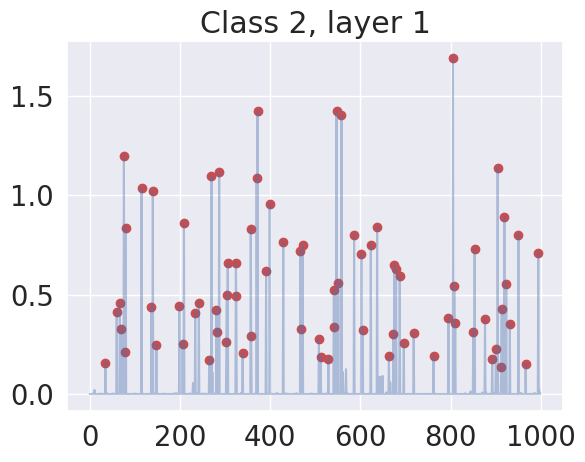

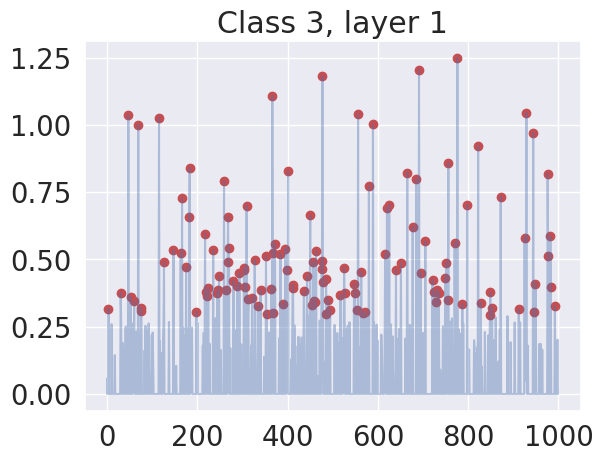

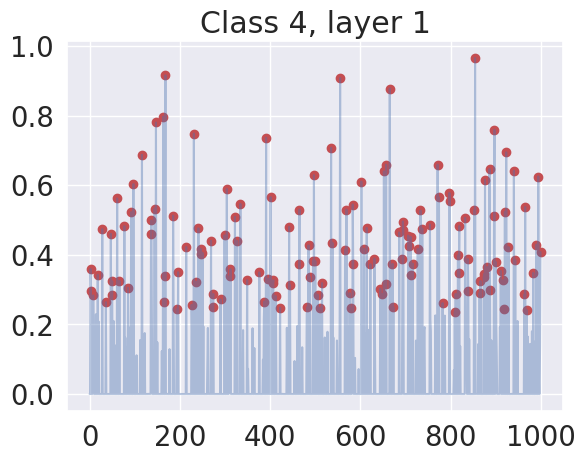

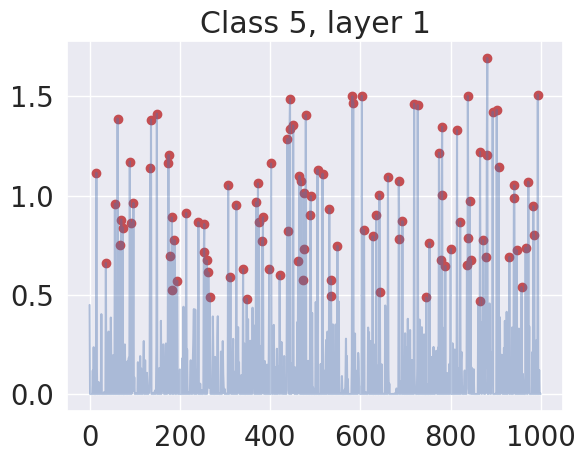

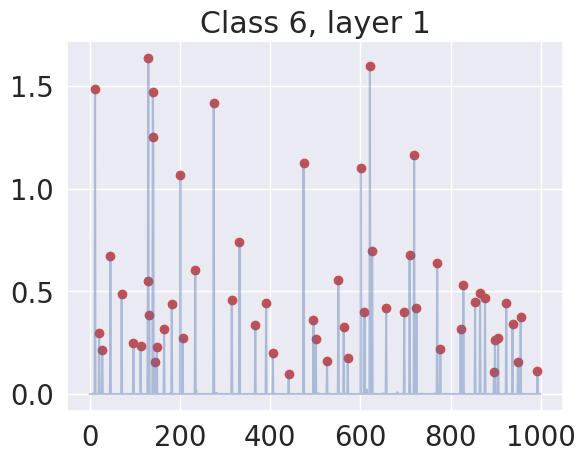

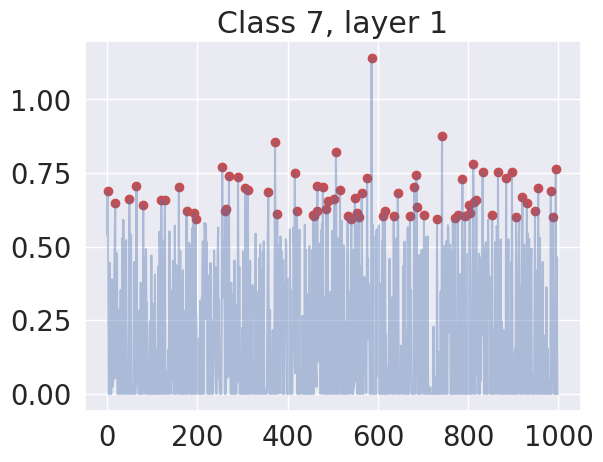

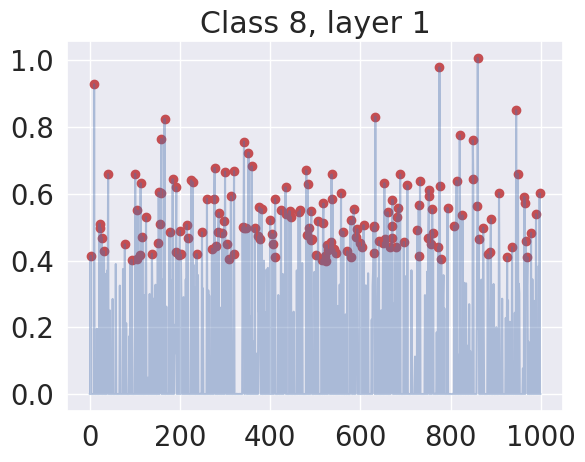

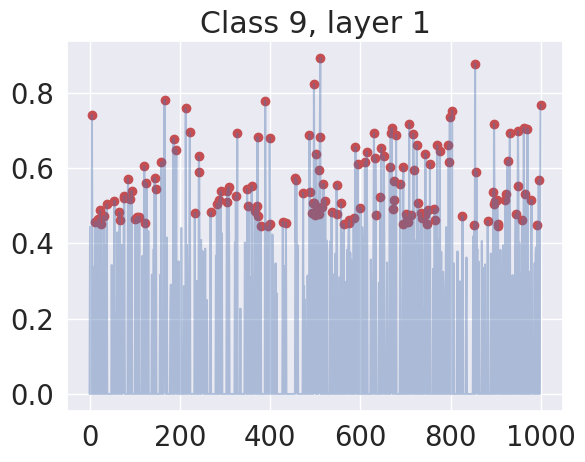

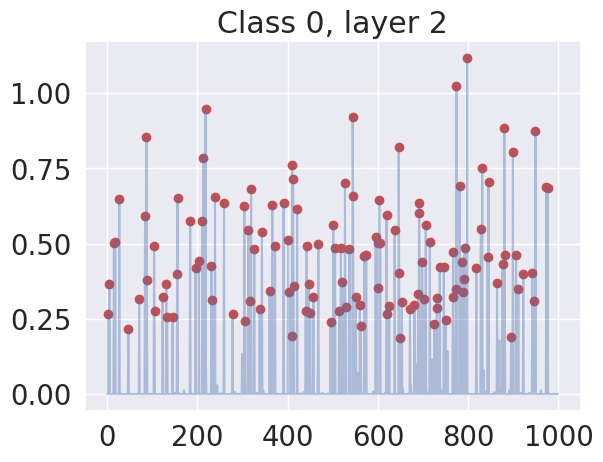

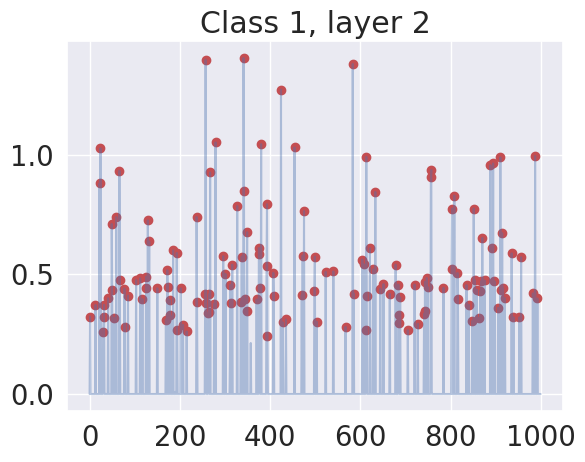

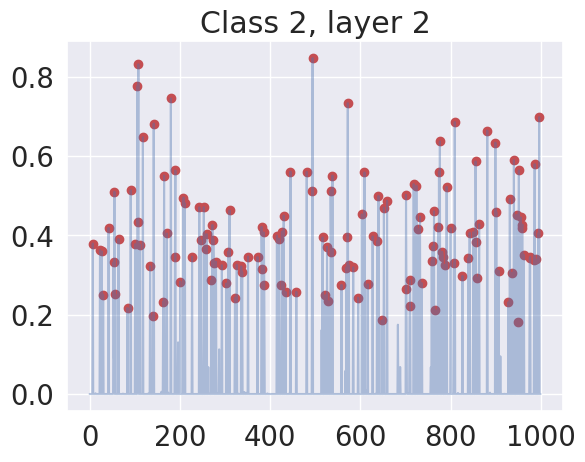

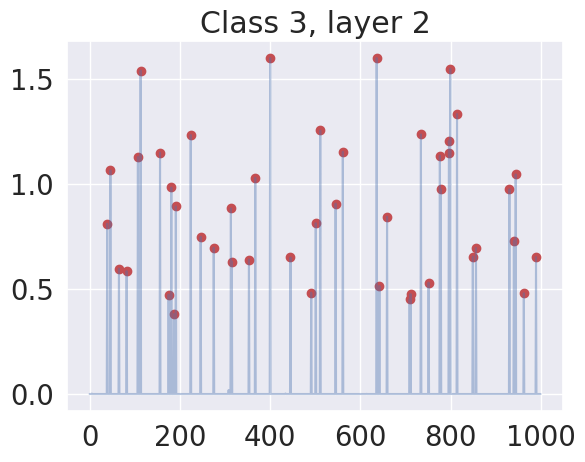

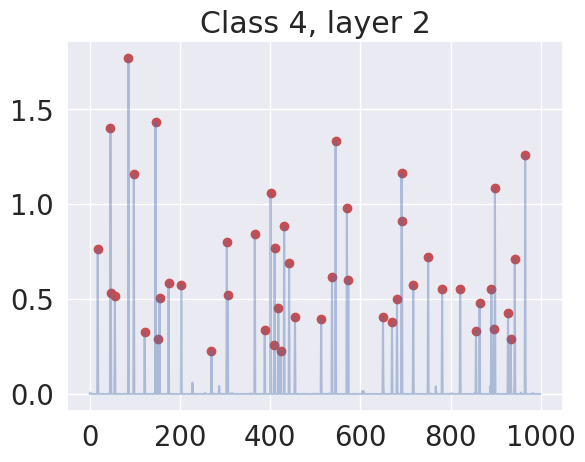

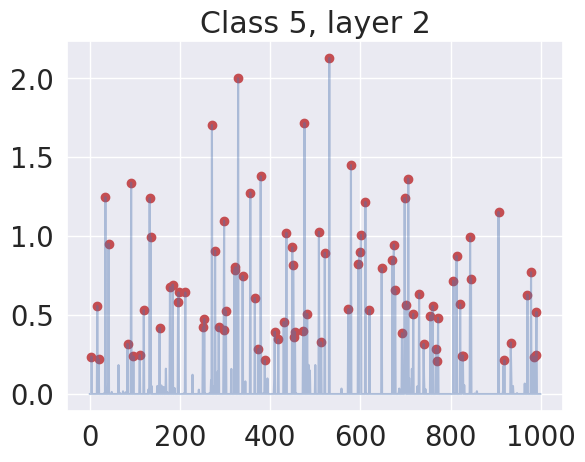

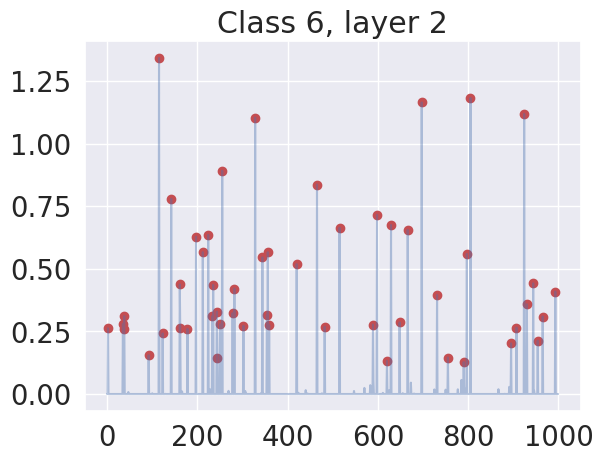

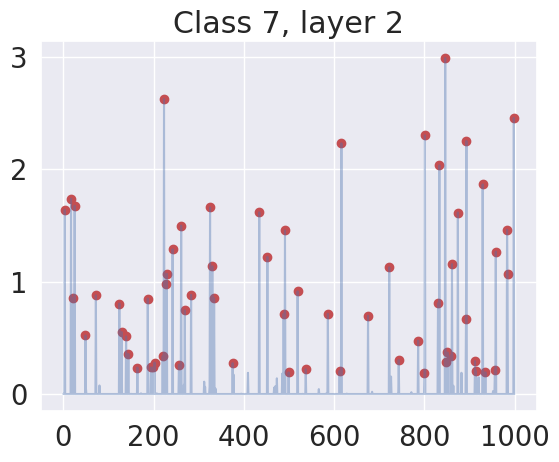

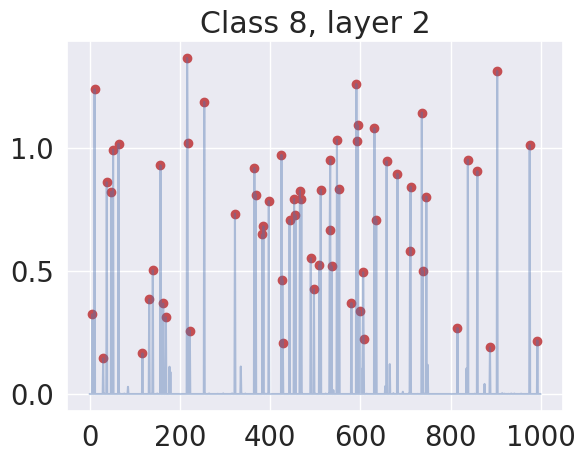

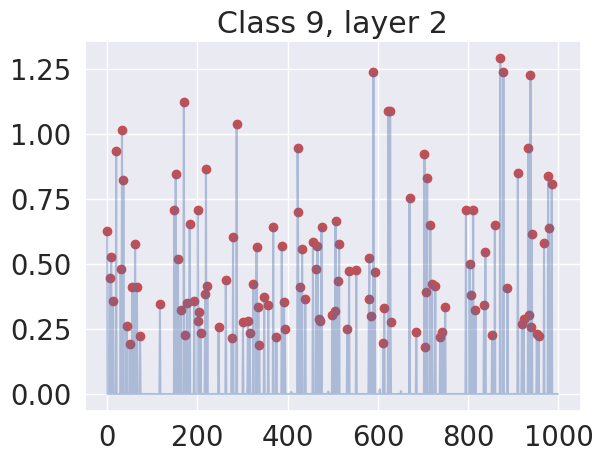

In [14]:
def ensembles_loo(representation, thr=0.05):
    means=representation.mean(0)
    ensemble=[]
    for n_id in range(representation.shape[1]):
        means[n_id]
        loo_mean=np.delete(means, n_id, axis=0).mean()
        if (means[n_id]-loo_mean)/loo_mean>2:
            ensemble.append(n_id)
        #print(means[n_id], loo_mean)
    return ensemble

path=f'/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_100_1024_0.01/'
reps=np.load(path+'reps_0.npy')
lbls=np.load(path+'lbls_0.npy')
preds=np.load(path+'prediction_0.npy')

total_data=len(preds)
order=np.argsort(lbls)
#order reps,lbls,preds
reps=reps[order]
lbls=lbls[order]
preds=preds[order]

correct=(lbls==preds)

reps=reps[correct]
lbls=lbls[correct]
preds=preds[correct]

for exp in range(1): 
    #reps,label,accuracy=load_data('/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_200_1024_0.001/')
    for layer in range(reps.shape[1]):
        data[f"layer_{layer}"]=dict()
        for lbl in range(10):
            rep=reps[lbls==lbl,layer,:]
            data[f"layer_{layer}"][f"class_{lbl}"]=ensembles_loo(rep,(layer,lbl))
            plt.figure()
            plt.plot(rep.mean(axis=0),alpha=0.4)
            signal=reps[lbls==lbl,layer,:].mean(axis=0)
            pallocchi=data[f"layer_{layer}"][f"class_{lbl}"]
            plt.scatter(pallocchi,signal[pallocchi],color='r')
            plt.title(f"Class {lbl}, layer {layer}")

In [15]:
df_ff.to_csv('df_ff_fashion.csv')
df_bp.to_csv('df_bp_fashion.csv')
df_bp_ff.to_csv('df_bp_ff_fashion.csv')